442 10
(442,)


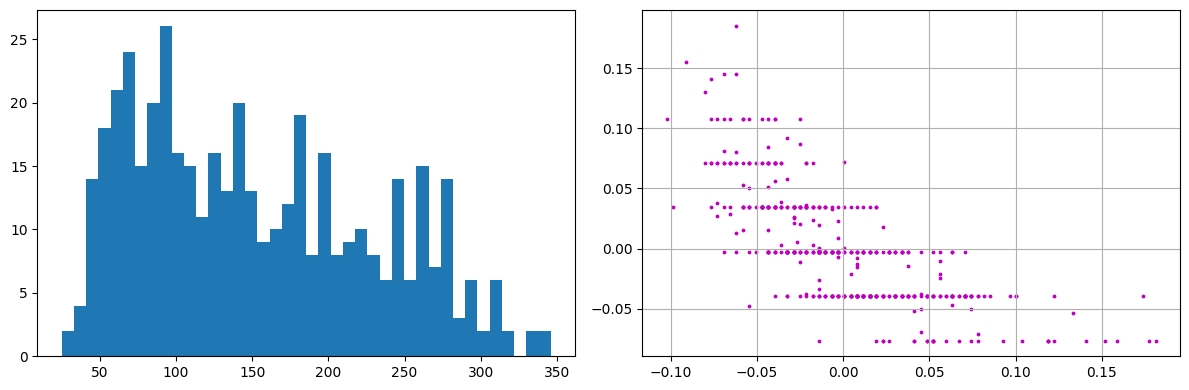

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt 
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizeDD
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c="m",s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")


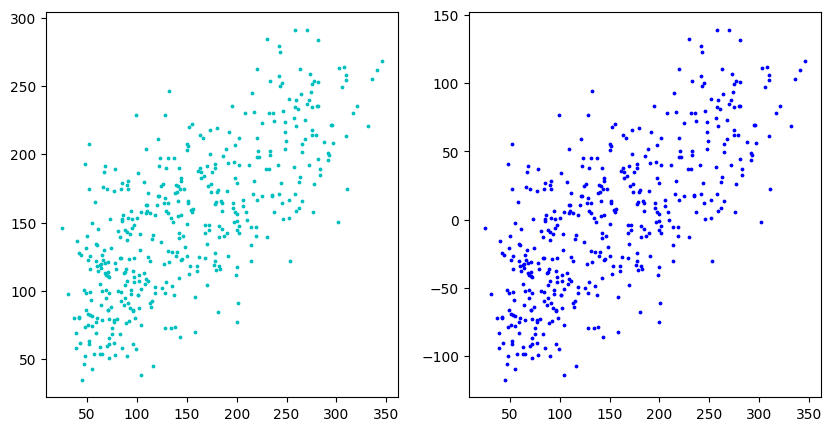

In [2]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c="c", s=3)
#
ax[1].scatter(t,th2,c="b",s=3)


<BarContainer object of 10 artists>

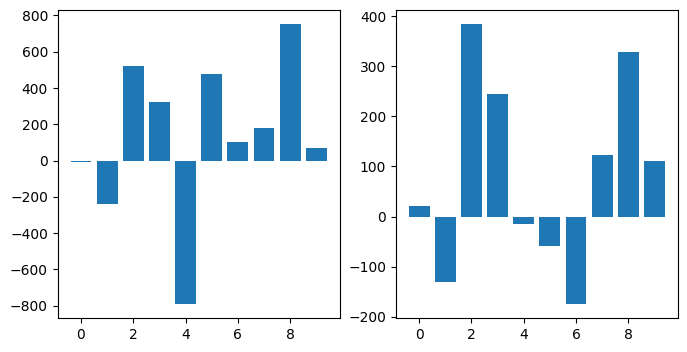

In [3]:
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t#l2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")
ax[1].bar(np.arange(len(wR)), wR)

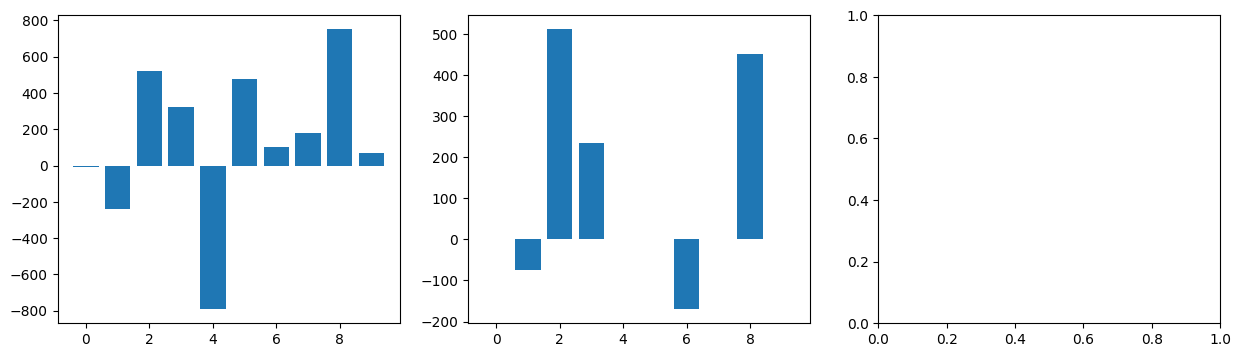

In [4]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)#l1
ll.fit(X, t)#
th_lasso = ll.predict(X)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w)
#
#...
ax[1].bar(np.arange(len(ll.coef_)), ll.coef_)

#
plt.savefig("solutions.png")



In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))


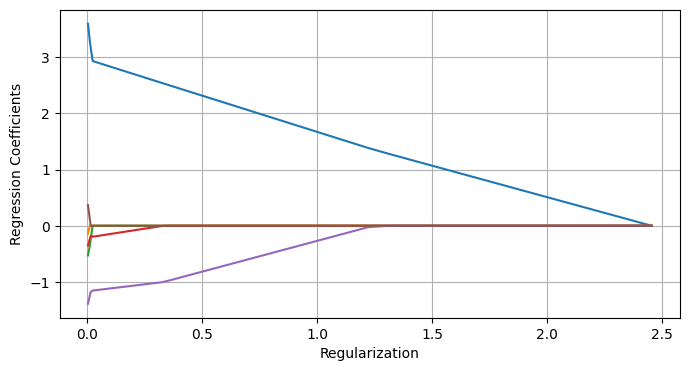

In [6]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
    ax.grid(True)
    ax.set_xlabel("Regularization")
    ax.set_ylabel("Regression Coefficients")


In [37]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


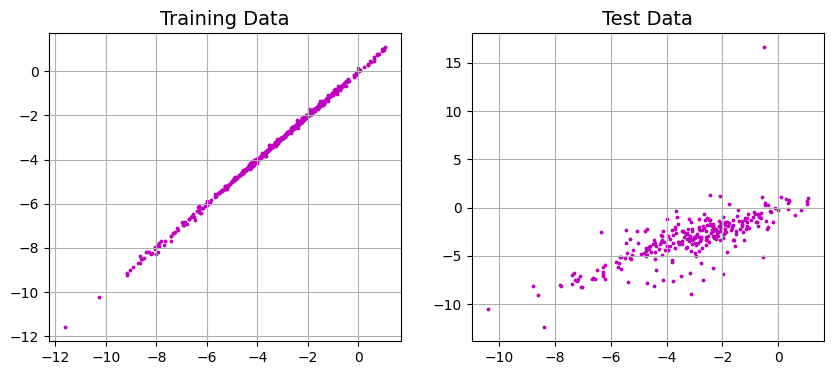

In [7]:
import pandas as pd
sol = pd.read_excel(r"C:\Users\26704\Desktop\Husskonen_Solubility_Features.xlsx", verbose=False).dropna()
print(sol.shape)
colnames = sol.columns
print(colnames)
t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:len(colnames)-1]].to_numpy()
N, p = X.shape
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#
gamma = 0.1
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c="m", s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)
ax[1].scatter(t_test, th_test, c="m", s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig("SolubilityPrediction.jpg")
# Over to you for implementing Lasso

D:\编程软件\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+02, tolerance: 2.703e-01
  model = cd_fast.enet_coordinate_descent(


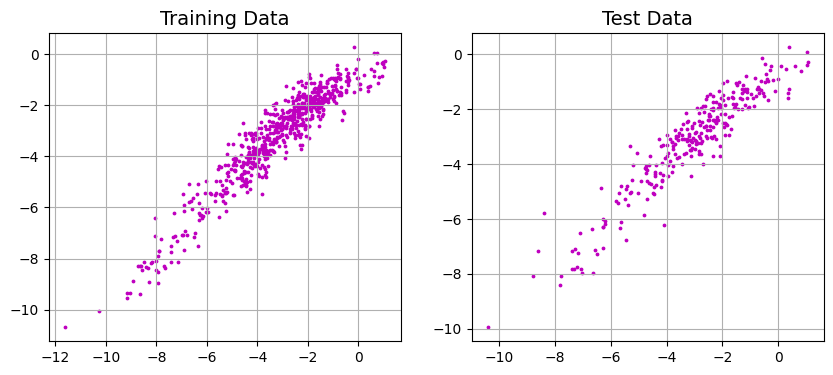

In [8]:
ll = Lasso(alpha=0.2)
ll.fit(X_train, t_train)#
th_lasso = ll.predict(X_train)
th_test = ll.predict(X_test)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_lasso , c="m", s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)
ax[1].scatter(t_test, th_test, c="m", s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig("SolubilityPrediction.jpg")

Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


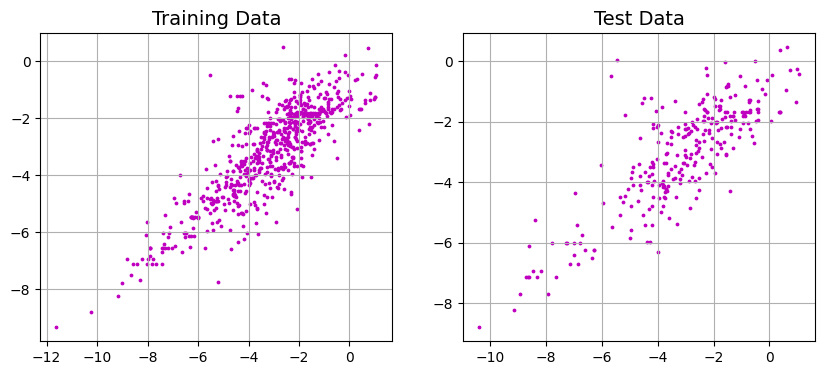

In [9]:
colnames = sol.columns
print(colnames)
t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:14]].to_numpy()
N, p = X.shape
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train_top10, t_test_top10= train_test_split(X, t, test_size=0.3)
# Regularized regression
#
gamma = 0.1
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train_top10#l2
th_train = X_train @ w
th_test = X_test @ w
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train_top10, th_train, c="m", s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)
ax[1].scatter(t_test_top10, th_test, c="m", s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig("SolubilityPrediction.jpg")


In [14]:
from sklearn.metrics import mean_squared_error
print("Linear Regression with Top 10 Features MSE (Train):", mean_squared_error(t_train_top10, th_train))


Linear Regression with Top 10 Features MSE (Train): 1.1282848942475414


In [15]:
from sklearn.metrics import mean_squared_error
print("Linear Regression with Top 10 Features MSE (Test):", mean_squared_error(t_test_top10, th_test))

Linear Regression with Top 10 Features MSE (Test): 1.4367240250150755
